<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Google play store Dataset EDA and Visualization</h3>
</div>

<h1 align="center">Yasin Azhdari</h1>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy   as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Prepare Data

In [2]:
googleplaystore_data=pd.read_csv("googleplaystore.csv")

In [3]:
type(googleplaystore_data)

pandas.core.frame.DataFrame

## EDA 

In [4]:
googleplaystore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
googleplaystore_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
googleplaystore_data.shape

(10841, 13)

In [7]:
googleplaystore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
googleplaystore_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [9]:
googleplaystore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
# Extracting the number of unique values in each column of the dataset
googleplaystore_data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [11]:
googleplaystore_data['Content Rating'].value_counts(normalize=True)*100

Everyone           80.387454
Teen               11.143911
Mature 17+          4.603321
Everyone 10+        3.819188
Adults only 18+     0.027675
Unrated             0.018450
Name: Content Rating, dtype: float64

In [12]:
googleplaystore_data['Type'].          value_counts(normalize=True)*100

Free    92.610701
Paid     7.380074
0        0.009225
Name: Type, dtype: float64

In [13]:
#In order to find the  row in the data set, which has been corrupted
googleplaystore_data[googleplaystore_data.Type=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
#Next, we will drop that corrupted row
#googleplaystore_data.drop([10472],inplace=True,axis=0)
googleplaystore_data.drop(googleplaystore_data[googleplaystore_data['Type']=='0'].index, inplace=True)

# Dealing with missing values

In [15]:
# Check for missing values
googleplaystore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
# Check for missing values indices in Rating column
missed_Ratings=np.where(googleplaystore_data['Rating'].isnull())[0]
missed_Ratings

array([   23,   113,   123, ..., 10830, 10834, 10837], dtype=int64)

In [17]:
#  Check for missing values indices in Types column

missed_Types=np.where(googleplaystore_data['Type']    .isnull())[0]
missed_Types

array([9148], dtype=int64)

In [18]:
#  Representing that specific row with NaN in Type

googleplaystore_data.loc[[9148]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [19]:
#  Check for missing values indices in Current Ver column

missed_CurrentVer=np.where(googleplaystore_data['Current Ver'].isnull())[0]
missed_CurrentVer

array([   15,  1553,  6322,  6803,  7333,  7407,  7730, 10342],
      dtype=int64)

In [20]:
#  Check for missing values indices in Android Ver column

missed_AndroidVer=np.where(googleplaystore_data['Android Ver'].isnull())[0]
missed_AndroidVer

array([4453, 4490], dtype=int64)

In [21]:
#  Next, we will drop all missing values off the dataset
googleplaystore_data=googleplaystore_data.dropna()

In [22]:
googleplaystore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# EDA (cont'd)

In [23]:
googleplaystore_data.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [24]:
googleplaystore_data.Reviews=googleplaystore_data.Reviews.astype('int64')

In [25]:
googleplaystore_data.describe()

,Rating,Reviews
count,9360.000000,9.360000e+03
mean,4.191838,5.143767e+05
std,0.515263,3.145023e+06
min,1.000000,1.000000e+00
25%,4.000000,1.867500e+02
50%,4.300000,5.955000e+03
75%,4.500000,8.162750e+04
max,5.000000,7.815831e+07


In [26]:
googleplaystore_data['Category'].      value_counts(normalize=True)*100

FAMILY                 18.653846
GAME                   11.720085
TOOLS                   7.831197
PRODUCTIVITY            3.750000
MEDICAL                 3.739316
COMMUNICATION           3.504274
FINANCE                 3.450855
SPORTS                  3.408120
PHOTOGRAPHY             3.386752
LIFESTYLE               3.354701
PERSONALIZATION         3.333333
BUSINESS                3.237179
HEALTH_AND_FITNESS      3.173077
SOCIAL                  2.767094
SHOPPING                2.542735
NEWS_AND_MAGAZINES      2.489316
TRAVEL_AND_LOCAL        2.414530
DATING                  2.083333
BOOKS_AND_REFERENCE     1.901709
VIDEO_PLAYERS           1.709402
EDUCATION               1.655983
ENTERTAINMENT           1.591880
MAPS_AND_NAVIGATION     1.324786
FOOD_AND_DRINK          1.164530
HOUSE_AND_HOME          0.811966
WEATHER                 0.801282
AUTO_AND_VEHICLES       0.779915
LIBRARIES_AND_DEMO      0.683761
ART_AND_DESIGN          0.651709
COMICS                  0.619658
PARENTING 

In [27]:
googleplaystore_data['Rating'].        value_counts(normalize=True)*100

4.4    11.837607
4.3    11.495726
4.5    11.079060
4.2    10.160256
4.6     8.792735
4.1     7.553419
4.0     6.057692
4.7     5.331197
3.9     4.123932
3.8     3.237179
5.0     2.927350
3.7     2.553419
4.8     2.500000
3.6     1.858974
3.5     1.741453
3.4     1.367521
3.3     1.089744
4.9     0.929487
3.0     0.886752
3.1     0.737179
3.2     0.673077
2.9     0.480769
2.8     0.448718
2.7     0.267094
2.6     0.267094
2.5     0.224359
2.3     0.213675
2.4     0.202991
1.0     0.170940
2.2     0.149573
1.9     0.138889
2.0     0.128205
1.7     0.085470
1.8     0.085470
2.1     0.085470
1.6     0.042735
1.4     0.032051
1.5     0.032051
1.2     0.010684
Name: Rating, dtype: float64

In [28]:
pd.crosstab( googleplaystore_data.Rating, googleplaystore_data.Type, normalize =    "index" )

Type,Free,Paid
Rating,,
1.0,0.875000,0.125000
1.2,1.000000,0.000000
1.4,1.000000,0.000000
1.5,1.000000,0.000000
1.6,1.000000,0.000000
1.7,0.875000,0.125000
1.8,0.875000,0.125000
1.9,1.000000,0.000000
2.0,0.916667,0.083333


In [29]:
pd.crosstab( googleplaystore_data.Rating, googleplaystore_data.Category,normalize = "index" )

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
Rating,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.062500,0.062500,0.000000,0.000000,...,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.187500,0.000000,0.000000,0.000000
1.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000
1.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
1.6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
1.7,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000
1.8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000
1.9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,...,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.153846,0.000000,0.076923,0.000000
2.0,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000


In [30]:
googleplaystore_data.groupby( 'Type' )['Rating'].    mean()

Type
Free    4.186288
Paid    4.266822
Name: Rating, dtype: float64

In [31]:
googleplaystore_data.groupby( 'Type' )['Rating'].  count()

Type
Free    8715
Paid     645
Name: Rating, dtype: int64

In [32]:
googleplaystore_data.groupby( 'Category' )['Rating'].mean()

Category
ART_AND_DESIGN         4.377049
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192383
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.179688
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335256
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047203
TRAVEL_AND_LOCAL       4.109292

In [33]:
googleplaystore_data.groupby(['Type','Content Rating']).mean()


Rating       Reviews
Type Content Rating                         
Free Adults only 18+  4.300000  2.711600e+04
     Everyone         4.181818  4.077717e+05
     Everyone 10+     4.251099  1.864980e+06
     Mature 17+       4.111937  4.423007e+05
     Teen             4.224639  1.088515e+06
     Unrated          4.100000  1.186000e+03
Paid Everyone         4.244545  5.188715e+03
     Everyone 10+     4.324242  1.558885e+05
     Mature 17+       4.423529  4.613459e+04
     Teen             4.437778  1.233758e+04

# Visualization

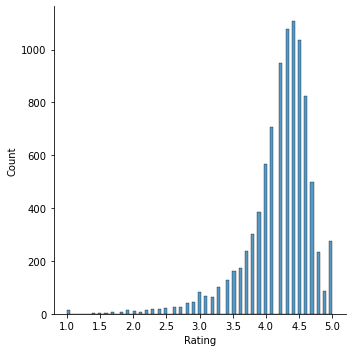

In [34]:
sns.displot(googleplaystore_data, x="Rating")

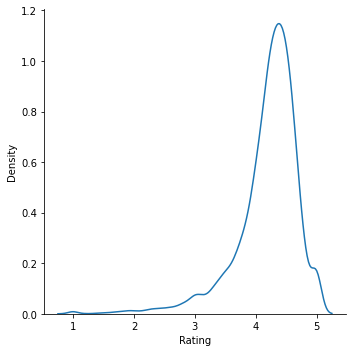

In [35]:
sns.displot(googleplaystore_data, x="Rating", kind="kde")

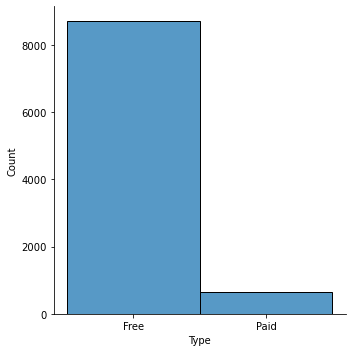

In [36]:
sns.displot(googleplaystore_data, x="Type")

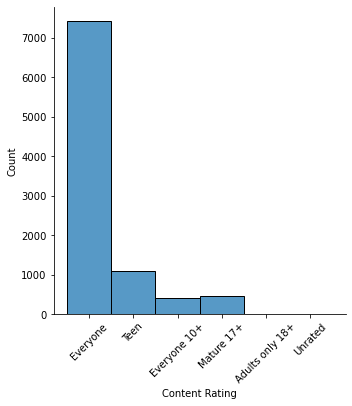

In [48]:
sns.displot(googleplaystore_data, x="Content Rating")
plt.xticks(rotation=45)
plt.show()

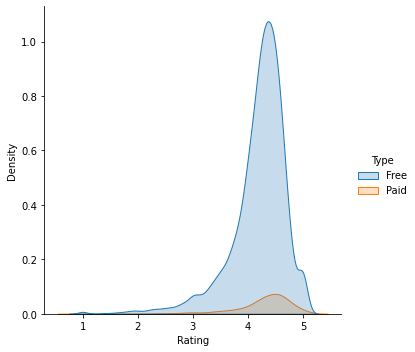

In [47]:
sns.displot(googleplaystore_data, x="Rating", hue='Type', kind="kde", fill="True")
plt.show()

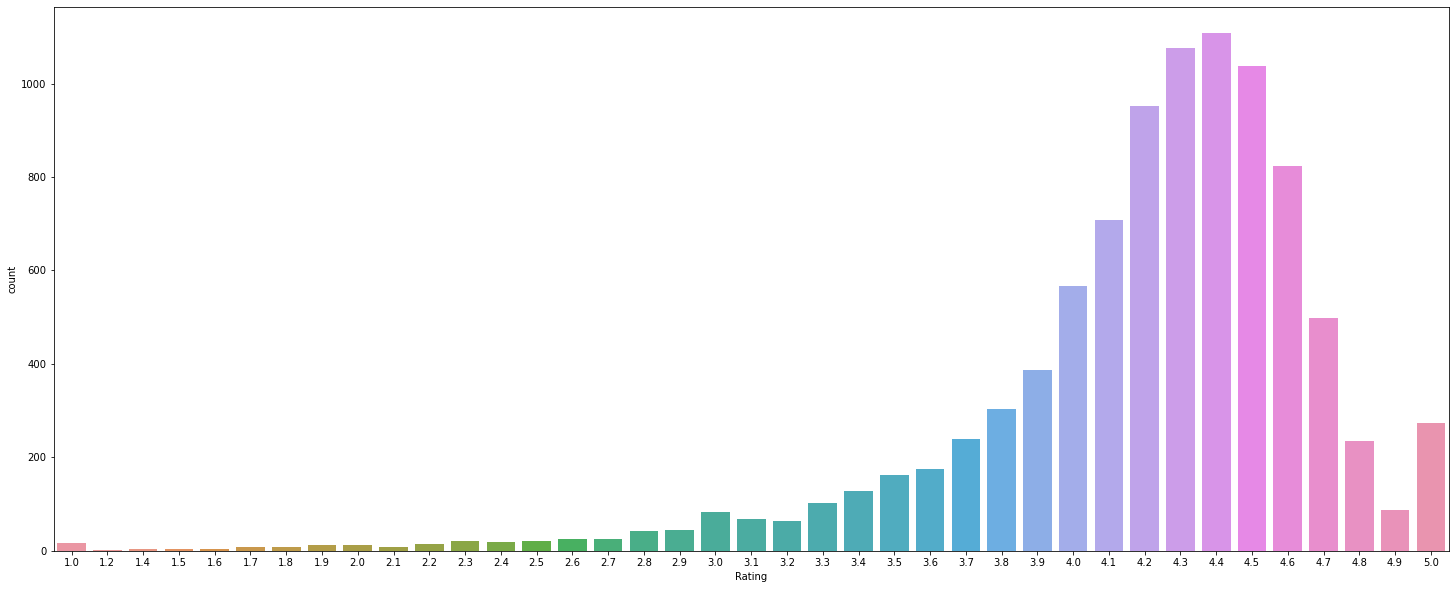

In [46]:
plt.figure(figsize=(25,10))
sns.countplot(x=googleplaystore_data['Rating'])
plt.show()

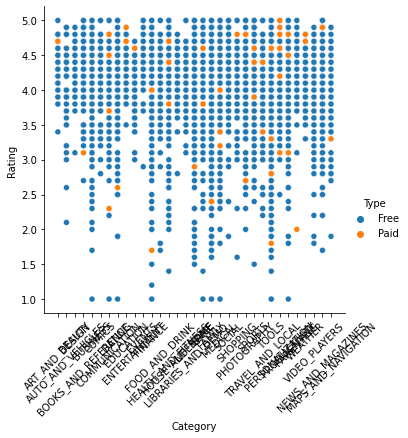

In [45]:
sns.relplot(x="Category", y="Rating", hue='Type', data=googleplaystore_data)
plt.xticks(rotation=45)
plt.show()

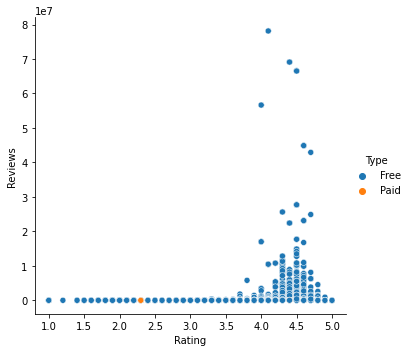

In [40]:
sns.relplot(x="Rating", y="Reviews", hue='Type', data=googleplaystore_data)